In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("ToyotaCorolla - MLR.csv")
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [3]:
df.isnull()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1431,False,False,False,False,False,False,False,False,False,False,False
1432,False,False,False,False,False,False,False,False,False,False,False
1433,False,False,False,False,False,False,False,False,False,False,False
1434,False,False,False,False,False,False,False,False,False,False,False


In [4]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [5]:
df.corr()

C:\Users\Likitha\AppData\Local\Temp\ipykernel_24420\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.033081,0.126389,0.185326,NaN,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614
Automatic,0.033081,0.031717,-0.081854,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249
cc,0.126389,-0.098084,0.102683,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,0.089614,0.057249,0.335637,0.302618,NaN,0.020613,1.000000


Descriptive Statistics for Numerical Features:


,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000



Value Counts for Categorical Features:

Value counts for Fuel_Type:


Petrol    1264
Diesel     155
CNG         17
Name: Fuel_Type, dtype: int64


Histograms for Numerical Features:


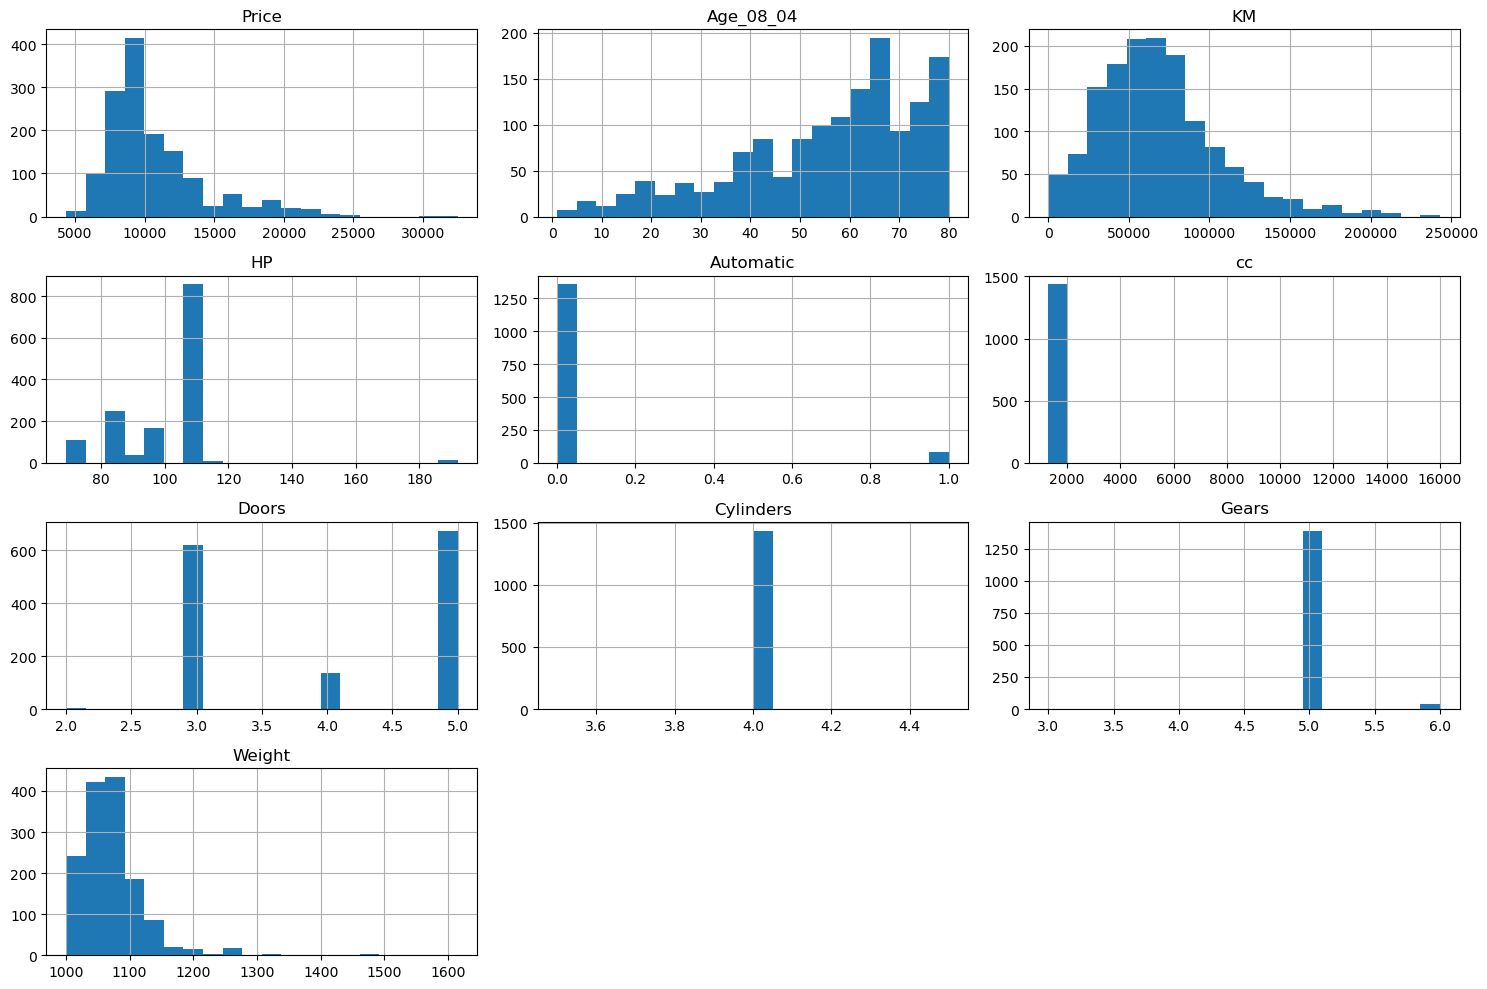


Box Plots for Numerical Features:


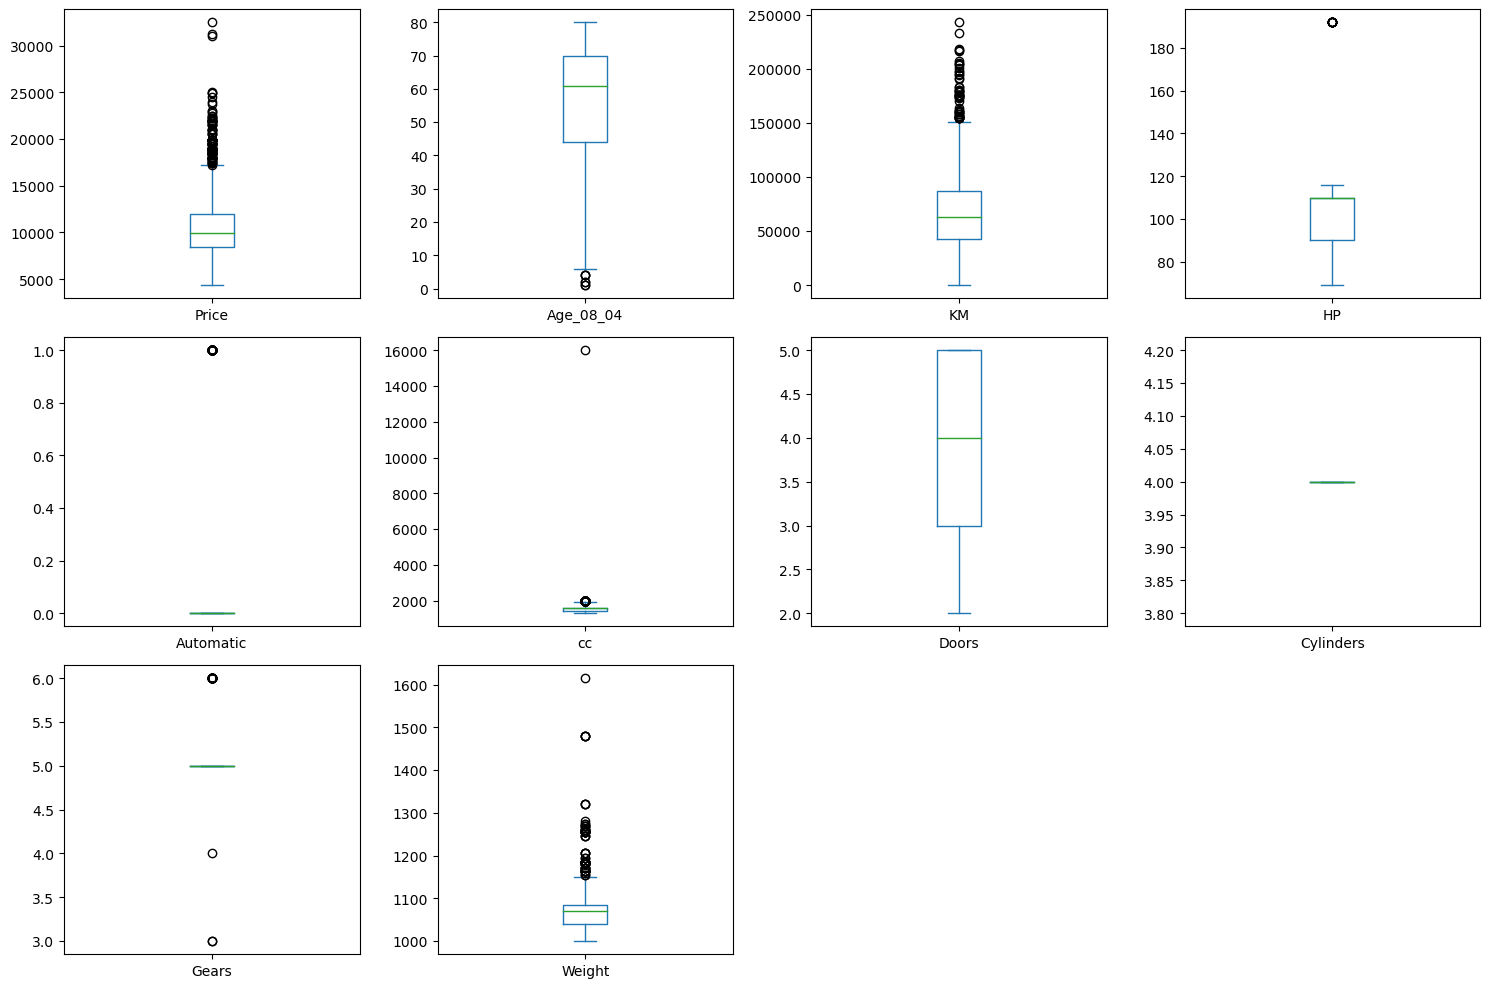


Bar Plots for Categorical Features:


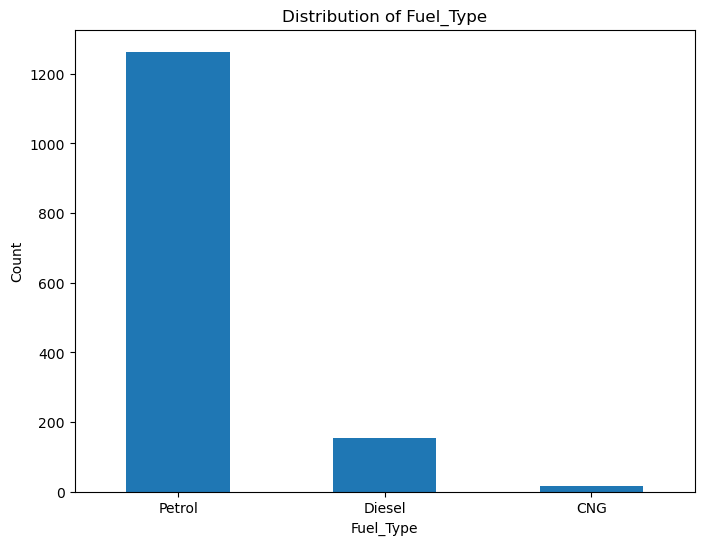

In [6]:
# Descriptive Statistics
print("Descriptive Statistics for Numerical Features:")
display(df.describe())

print("\nValue Counts for Categorical Features:")
for col in df.select_dtypes(include='object').columns:
    print(f"\nValue counts for {col}:")
    display(df[col].value_counts())

# Visualizations (Univariate Analysis)

# Histograms for numerical features
print("\nHistograms for Numerical Features:")
df.select_dtypes(include=np.number).hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

# Box plots for numerical features to visualize outliers
print("\nBox Plots for Numerical Features:")
df.select_dtypes(include=np.number).plot(kind='box', subplots=True, layout=(3, 4), figsize=(15, 10))
plt.tight_layout()
plt.show()

# Bar plots for categorical features
print("\nBar Plots for Categorical Features:")
for col in df.select_dtypes(include='object').columns:
    plt.figure(figsize=(8, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

In [7]:
# Select features and target variable
features = ['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors', 'Gears', 'Weight']
target = 'Price'

X = df[features]
y = df[target]

# Identify categorical and numerical features
categorical_features = ['Fuel_Type']
numerical_features = ['Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Gears', 'Weight']

# Create a column transformer for one-hot encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)],
    remainder='passthrough')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline that first preprocesses the data and then trains a linear regression model
# Using scikit-learn's LinearRegression
from sklearn.linear_model import LinearRegression

model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', LinearRegression())])

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 2203043.8231431674
R-squared: 0.8348888040611483


In [8]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1148, 9)
Shape of X_test: (288, 9)
Shape of y_train: (1148,)
Shape of y_test: (288,)


In [9]:
# Preprocess the training data
X_train_processed = preprocessor.fit_transform(X_train)

# Add a constant to the independent variables for the statsmodels OLS model
X_train_processed = sm.add_constant(X_train_processed)

# Build the multiple linear regression model using the training dataset
model_sm = sm.OLS(y_train, X_train_processed).fit()

# Print the model summary
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     762.7
Date:                Fri, 20 Feb 2026   Prob (F-statistic):               0.00
Time:                        17:53:57   Log-Likelihood:                -9863.2
No. Observations:                1148   AIC:                         1.975e+04
Df Residuals:                    1137   BIC:                         1.980e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.037e+04   1317.259     -7.869      0.0

In [10]:
# Preprocess the test data
X_test_processed = preprocessor.transform(X_test)

# Add a constant to the independent variables for the statsmodels OLS model
X_test_processed = sm.add_constant(X_test_processed)

# Make predictions on the test set
y_pred_sm = model_sm.predict(X_test_processed)

# Evaluate the model on the test set
mse_sm = mean_squared_error(y_test, y_pred_sm)
r2_sm = r2_score(y_test, y_pred_sm)

print(f'Statsmodels Model - Mean Squared Error on Test Set: {mse_sm}')
print(f'Statsmodels Model - R-squared on Test Set: {r2_sm}')

Statsmodels Model - Mean Squared Error on Test Set: 2203043.823159977
Statsmodels Model - R-squared on Test Set: 0.8348888040598885


In [11]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression Model
ridge_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', Ridge())])

# Train the Ridge model
ridge_model.fit(X_train, y_train)

# Make predictions with Ridge model
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the Ridge model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f'Ridge Regression - Mean Squared Error on Test Set: {mse_ridge}')
print(f'Ridge Regression - R-squared on Test Set: {r2_ridge}')

# Lasso Regression Model
lasso_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', Lasso())])

# Train the Lasso model
lasso_model.fit(X_train, y_train)

# Make predictions with Lasso model
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the Lasso model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f'Lasso Regression - Mean Squared Error on Test Set: {mse_lasso}')
print(f'Lasso Regression - R-squared on Test Set: {r2_lasso}')

Ridge Regression - Mean Squared Error on Test Set: 2198251.107332799
Ridge Regression - R-squared on Test Set: 0.8352480030162177
Lasso Regression - Mean Squared Error on Test Set: 2195388.084834372
Lasso Regression - R-squared on Test Set: 0.8354625775352305


In [12]:
from sklearn.linear_model import ElasticNet

# Elastic-Net Regression Model
elastic_net_model = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('regressor', ElasticNet())])

# Train the Elastic-Net model
elastic_net_model.fit(X_train, y_train)

# Make predictions with Elastic-Net model
y_pred_elastic_net = elastic_net_model.predict(X_test)

# Evaluate the Elastic-Net model
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
r2_elastic_net = r2_score(y_test, y_pred_elastic_net)
print(f'Elastic-Net Regression - Mean Squared Error on Test Set: {mse_elastic_net}')
print(f'Elastic-Net Regression - R-squared on Test Set: {r2_elastic_net}')

Elastic-Net Regression - Mean Squared Error on Test Set: 2008417.6276226863
Elastic-Net Regression - R-squared on Test Set: 0.8494754244296743


In [13]:
print("Model Performance Comparison on Test Set:")

# Scikit-learn Linear Regression (from cell U-IvmUps0NbM)
print(f'Scikit-learn Linear Regression - Mean Squared Error: {mse}')
print(f'Scikit-learn Linear Regression - R-squared: {r2}')

# Statsmodels OLS Regression (from cell a4630028)
print(f'Statsmodels OLS Regression - Mean Squared Error: {mse_sm}')
print(f'Statsmodels OLS Regression - R-squared: {r2_sm}')

# Ridge Regression (from cell lIn1HodW1aog)
print(f'Ridge Regression - Mean Squared Error: {mse_ridge}')
print(f'Ridge Regression - R-squared: {r2_ridge}')

# Lasso Regression (from cell lIn1HodW1aog)
print(f'Lasso Regression - Mean Squared Error: {mse_lasso}')
print(f'Lasso Regression - R-squared: {r2_lasso}')

# Elastic-Net Regression (from cell riLz57R51nPs)
print(f'Elastic-Net Regression - Mean Squared Error: {mse_elastic_net}')
print(f'Elastic-Net Regression - R-squared: {r2_elastic_net}')

Model Performance Comparison on Test Set:
Scikit-learn Linear Regression - Mean Squared Error: 2203043.8231431674
Scikit-learn Linear Regression - R-squared: 0.8348888040611483
Statsmodels OLS Regression - Mean Squared Error: 2203043.823159977
Statsmodels OLS Regression - R-squared: 0.8348888040598885
Ridge Regression - Mean Squared Error: 2198251.107332799
Ridge Regression - R-squared: 0.8352480030162177
Lasso Regression - Mean Squared Error: 2195388.084834372
Lasso Regression - R-squared: 0.8354625775352305
Elastic-Net Regression - Mean Squared Error: 2008417.6276226863
Elastic-Net Regression - R-squared: 0.8494754244296743


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

# Create the Elastic-Net model within a pipeline (including preprocessing)
elastic_net_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('regressor', ElasticNet())])

# Define the parameter grid for hyperparameter tuning
# We'll tune the alpha (regularization strength) and l1_ratio (mix of L1 and L2 penalties)
param_grid = {
    'regressor__alpha': [0.1, 0.5, 1.0, 5.0, 10.0],
    'regressor__l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 1.0]
}

# Create GridSearchCV object
# cv=5 means 5-fold cross-validation
grid_search = GridSearchCV(elastic_net_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_elastic_net_model = grid_search.best_estimator_

print(f"Best Hyperparameters for Elastic-Net: {best_params}")

# Make predictions with the best Elastic-Net model
y_pred_best_elastic_net = best_elastic_net_model.predict(X_test)

# Evaluate the best Elastic-Net model on the test set
mse_best_elastic_net = mean_squared_error(y_test, y_pred_best_elastic_net)
r2_best_elastic_net = r2_score(y_test, y_pred_best_elastic_net)

print(f'Best Elastic-Net Regression - Mean Squared Error on Test Set: {mse_best_elastic_net}')
print(f'Best Elastic-Net Regression - R-squared on Test Set: {r2_best_elastic_net}')

Best Hyperparameters for Elastic-Net: {'regressor__alpha': 10.0, 'regressor__l1_ratio': 0.1}
Best Elastic-Net Regression - Mean Squared Error on Test Set: 2028955.55258963
Best Elastic-Net Regression - R-squared on Test Set: 0.8479361716387078


# Interview Questions

# Normalization and Standardization

###**Normalization** and **Standardization** are common data preprocessing techniques used to scale numerical features in a dataset. The goal is to transform the values of numerical columns to a similar range, which can be beneficial for many machine learning algorithms.

###*   **Normalization (Min-Max Scaling):** This technique rescales the features to a fixed range, usually between 0 and 1.

# Techniques to Address Multicollinearity in Multiple Linear Regression
 Multicollinearity occurs when two or more predictor variables in a multiple regression model are highly correlated with each other.
 While multicollinearity doesn't violate the assumptions of OLS regression, it can make it difficult to interpret the individual coefficients and can lead to an unstable model.

# 1. Identify Multicollinearity:
   - Correlation Matrix: Calculate the correlation matrix of the predictor variables. High correlation coefficients (e.g., above 0.8) between pairs of variables indicate potential multicollinearity.
    - Variance Inflation Factor (VIF): Calculate the VIF for each predictor variable. VIF measures how much the variance of the estimated regression coefficient is increased due to multicollinearity. A VIF value greater than 5 or 10 is often considered an indication of significant multicollinearity.

# 2. Address Multicollinearity:
   - Remove one of the correlated variables: If two variables are highly correlated, you can remove one of them from the model. Choose the variable that is less theoretically important or has a weaker individual correlation with the target variable.
  - Combine correlated variables: Create a new variable that is a composite of the highly correlated variables. For example, you could average them or sum them up if it makes theoretical sense.
   - Principal Component Analysis (PCA): PCA is a dimensionality reduction technique that can transform the correlated variables into a smaller set of uncorrelated variables (principal components). These principal components can then be used as predictors in the regression model.
  - Ridge Regression and Lasso Regression: These are regularization techniques that can help mitigate the effects of multicollinearity by adding a penalty term to the regression equation. Ridge regression shrinks the coefficients towards zero, while Lasso regression can set some coefficients exactly to zero, effectively performing feature selection. Elastic-Net is a combination of both.
- Collect more data: In some cases, increasing the sample size can help reduce the impact of multicollinearity
- Domain Knowledge: Use your understanding of the data and the problem domain to decide which variables are most important and how to handle correlated variables.
- The choice of technique depends on the specific dataset, the degree of multicollinearity, and the goals of the analysis.
- It's often a good practice to try a few different approaches and see which one yields the best results and interpretability.